###  Desafio - IMPULSO -  Lucas Santos Silva ### 

**Para iniciar o desafio, fiz a importação de algumas bibliotecas a serem utilizadas nesta análise.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import missingno as msno 
import matplotlib as mat
from matplotlib import pyplot as plt

**Importação dos datasets que foram disponibilizados para o desafio. Para isso, utilizei a biblioteca Pandas e o read_csv para importação.**

In [4]:
tracker_df = pd.read_csv("Desafio-Impulso-NPI-Municipios-BR - Tracker-Municipal.csv")
cidades_df = pd.read_csv('Desafio-Impulso-NPI-Municipios-BR - dados-cidades.csv')

**Utilizei o .head() para mostrar as 5 primeiras linhas do arquivo.**

In [5]:
tracker_df.head()

,UF,MUN,COD_IBGE,num_mortes_prioridade,tipo,data_da_atualizacao,escolas_municipais_fechadas,Observações,escolas_estaduais_fechadas,Observações.1,...,Observações.18,obrigatoriedade_uso_mascaras_espacos_publicos,Observações.19,limite_pessoas_por_aglomeracao,Observações.20,aplicacao_de_multa,Observações.21,Início de testagem,Observações.22,observação
0,SP,Sao Paulo,3550308,643.0,data_comeco,6/22/2020,3/22/2020,"Início dos decretos em 22 de março, tiveram vá...",3/22/2020,"Início dos decretos em 22 de março, tiveram vá...",...,NaN,4/5/2020,NaN,3/22/2020,"Início dos decretos em 22 de março, tiveram vá...",4/5/2020,NaN,18/05/2020,2 milhões de testes rápidos,NaN
1,SP,Sao Paulo,3550308,643.0,data_fim,6/22/2020,6/28/2020,NaN,6/28/2020,NaN,...,NaN,NaN,Enquanto perdurar a medida de quarentena esse ...,5/31/2020,NaN,NaN,Enquanto perdurar a medida de quarentena esse ...,NaN,NaN,NaN
2,SP,Sao Paulo,3550308,643.0,fonte,6/22/2020,https://www.saopaulo.sp.gov.br/coronavirus/qua...,NaN,https://www.saopaulo.sp.gov.br/coronavirus/qua...,NaN,...,NaN,DECRETO Nº 64.959,NaN,Decreto 64.967 (http://diariooficial.imprensao...,NaN,DECRETO Nº 64.959,NaN,https://www.infomoney.com.br/economia/coronavi...,NaN,NaN
3,RJ,Rio de Janeiro,3304557,219.0,data_comeco,6/22/2020,3/21/2020,Fase 3 em 2 de julho (creches e 5 e 9 ano esco...,3/21/2020,Fase 3 em 2 de julho (creches e 5 e 9 ano esco...,...,NaN,4/23/2020,NaN,3/27/2020,NaN,3/26/2020,NaN,NaN,12 de maio (https://g1.globo.com/rj/rio-de-jan...,NaN
4,RJ,Rio de Janeiro,3304557,219.0,data_fim,6/22/2020,7/2/2020,NaN,7/2/2020,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29 de abril (https://g1.globo.com/rj/rio-de-ja...,NaN


**Utilizei o .info() para mostrar o total de linhas, colunas e o seu tipo, além de visualizar a quantidade de arquivos não nulos do meu dataframe.**

In [6]:
tracker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 53 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   UF                                              1041 non-null   object 
 1   MUN                                             1041 non-null   object 
 2   COD_IBGE                                        1041 non-null   int64  
 3   num_mortes_prioridade                           267 non-null    float64
 4   tipo                                            1041 non-null   object 
 5   data_da_atualizacao                             280 non-null    object 
 6   escolas_municipais_fechadas                     226 non-null    object 
 7   Observações                                     14 non-null     object 
 8   escolas_estaduais_fechadas                      175 non-null    object 
 9   Observações.1                            

**Como podemos perceber, temos um dataframe com vários dados faltantes. Dados ausentes são comuns em muitas aplicações, mas fiquei surpreso com essa base de dados, pelo motivo de ser uma base com poucas linhas em comparação com outras, e pela quantidade de dados ausentes. Portanto, para efeito de análise, calculei a porcentagem de dados faltantes em cada coluna do dataframe.**

In [7]:
#retorna o percentual faltante de valores em cada coluna.
dadosfaltantesPercent =  (tracker_df.isnull().sum() / len(tracker_df['UF'])*100)
print(dadosfaltantesPercent)

UF                                                  0.000000
MUN                                                 0.000000
COD_IBGE                                            0.000000
num_mortes_prioridade                              74.351585
tipo                                                0.000000
data_da_atualizacao                                73.102786
escolas_municipais_fechadas                        78.290106
Observações                                        98.655139
escolas_estaduais_fechadas                         83.189241
Observações.1                                      99.039385
universidades_fechadas                             86.935639
Observações.2                                      99.231508
comercio_nao_essencial_fechado                     79.250720
Observações.3                                      97.022094
espacos_publicos_fechados                          81.844380
Observações.4                                      99.039385
transporte_publico_reduz

**Além do percentual de dados faltantes em cada coluna, utilizei a biblioteca 'missingno' para visualizar os valores ausentes no conjunto de dados em um gráfico de barras, onde as barras na cor cinza representam a quantidade presente de dados em cada coluna.**

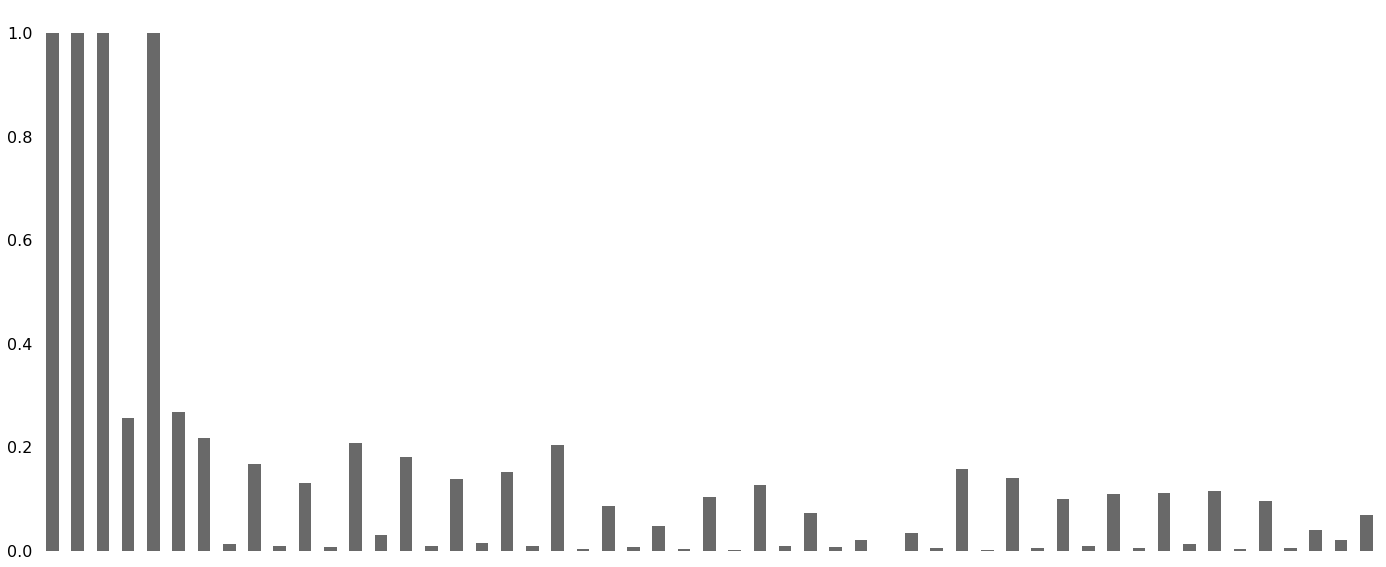

In [8]:
# visualização de dados faltantes 
msno.bar(tracker_df) 

**Além dos dados faltantes, temos nesse dataframe muitos dados considerados como sujos, ou seja, valores inconsistentes de acordo com o dicionário de dados e a coluna a qual pertence. Portanto, utilizei o loop abaixo para fazer a limpeza e a preparação das informações divergentes do meu dicionário de dados, excluindo por exemplo hiperlinks etc.**

In [9]:
    
for column in tracker_df.columns:
    if (tracker_df[column].dtypes == 'object'):
        tracker_df[column].loc[tracker_df[column].str.contains("http", na=False)] = None
        tracker_df[column].loc[tracker_df[column].str.contains("DECRETO", na=False)] = None
        tracker_df[column].loc[tracker_df[column].str.contains("Decreto", na=False)] = None
        tracker_df[column].loc[tracker_df[column].str.contains("lojas", na=False)] = None
        tracker_df[column].loc[tracker_df[column].str.contains("estão", na=False)] = None
        tracker_df[column].loc[tracker_df[column].str.contains(";", na=False)] = None
        tracker_df[column].loc[tracker_df[column].str.contains("fonte", na=False)] = None
        tracker_df[column].value_counts()
        print(column)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


UF
MUN
tipo
data_da_atualizacao
escolas_municipais_fechadas
Observações
escolas_estaduais_fechadas
Observações.1
universidades_fechadas
Observações.2
comercio_nao_essencial_fechado
Observações.3
espacos_publicos_fechados
Observações.4
transporte_publico_reduzido
Observações.5
igrejas_fechadas
Observações.6
eventos_de_grande_porte_cancelados
Observações.7
transporte_rodoviário_intermunicipal_cancelado
Observações.8
entrada_restrita_a_residentes
Observações.9
doentes_orientados_a_ficar_em_casa
Observações.10
distribuicao_merenda_escolar
Observações.11
restricao_horario_comercio
Observações.12
toque_de_recolher
circulacao_apenas_com_autorizacao
Observações.14
antecipacao_vacinacao
Observações.15
desinfeccao_cidade
Observações.16
distribuicao_cesta_basica
Observações.17
campanhas_publicas_para_ficar_em_casa
Observações.18
obrigatoriedade_uso_mascaras_espacos_publicos
Observações.19
limite_pessoas_por_aglomeracao
Observações.20
aplicacao_de_multa
Observações.21
Início de testagem
Observaçõe

**Visualizei quais colunas não fariam parte da minha análise de dados, e através do método drop, fiz a exclusão de todas as colunas que não faziam sentido. Perceba que gerei um novo dataframe (limpo) sem as colunas indesejadas.**

In [10]:
columns_to_drop = ['observação','Observações.22','Observações.21','Observações.20','Observações.19','Observações.18','Observações.17', 'Observações.16', 'Observações.15', 'Observações.14', 'Observações.13', 'Observações.12', 'Observações.11', 'Observações.10', 'Observações.9', 'Observações.8', 'Observações.7', 'Observações.6', 'Observações.5', 'Observações.4', 'Observações.3', 'Observações.2', 'Observações.1', 'Observações']

tracker_df_limpo = tracker_df.drop(columns_to_drop, axis=1)

**Neste momento, comecei a preparar os dados dos dois dataframes importados para serem utilizados juntos, em um mesmo dataframe. Para isso, alterei o nome da coluna referente ao código do IBGE para ambos os dataframes terem o mesmo nome da coluna, e assim, através do método merge, fundir os dois dataframes. Perceba que gerei um novo dataframe completo, com os dois dataframes fundidos.**

In [11]:
new_column_names = ['date', 'state', 'city', 'COD_IBGE', 'place_type', 'confirmed',
       'deaths', 'is_last', 'estimated_population_2019',
       'confirmed_per_100k_inhabitants', 'death_rate']

cidades_df.columns = new_column_names

In [12]:

completo_df = pd.merge(cidades_df, tracker_df_limpo, on='COD_IBGE', how='inner')

In [13]:
completo_df.head()

,date,state,city,COD_IBGE,place_type,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants,...,toque_de_recolher,circulacao_apenas_com_autorizacao,antecipacao_vacinacao,desinfeccao_cidade,distribuicao_cesta_basica,campanhas_publicas_para_ficar_em_casa,obrigatoriedade_uso_mascaras_espacos_publicos,limite_pessoas_por_aglomeracao,aplicacao_de_multa,Início de testagem
0,4/17/20,AC,Plácido de Castro,1200385,city,14,1,True,19761,70.84662,...,4/17/2020,4/17/2020,NaN,4/8/2020,3/30/2020,3/27/2020,4/20/2020,3/18/2020,4/20/2020,NaN
1,4/17/20,AC,Plácido de Castro,1200385,city,14,1,True,19761,70.84662,...,NaN,NaN,NaN,NaN,NaN,NaN,5/5/2020,NaN,5/5/2020,NaN
2,4/17/20,AC,Plácido de Castro,1200385,city,14,1,True,19761,70.84662,...,None,None,NaN,None,None,None,None,None,None,NaN
3,4/17/20,AC,Rio Branco,1200401,city,105,4,True,407319,25.77832,...,NaN,NaN,3/23/2020,3/17/2020,NaN,4/17/2020,NaN,NaN,NaN,NaN
4,4/17/20,AC,Rio Branco,1200401,city,105,4,True,407319,25.77832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Primeira análise gráfica referente ao Dataframe completo comparando o total de mortes acumuladas por estado.**

Text(0.5, 1.0, 'Gráfico com Total de mortes acumulados por Estado')

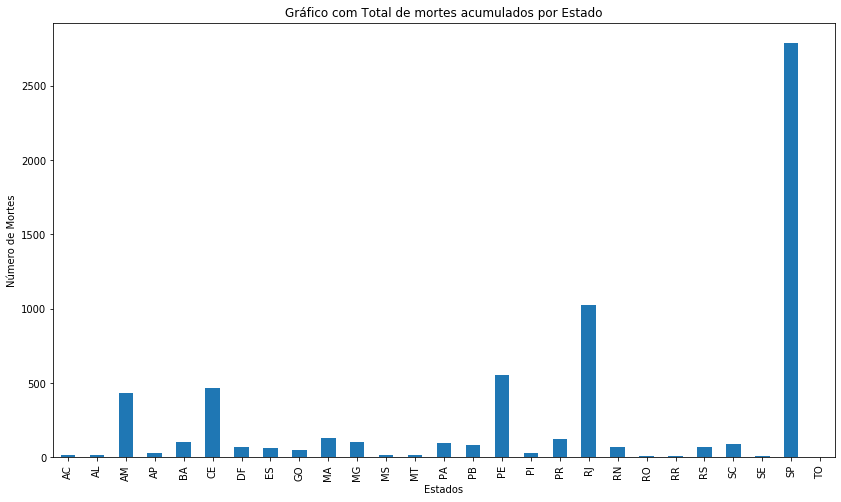

In [14]:
plt.figure(figsize=(14,8))
completo_df.groupby("UF")["deaths"].sum().plot.bar()
plt.xlabel('Estados')
plt.ylabel('Número de Mortes')
plt.title('Gráfico com Total de mortes acumulados por Estado')

**Análises**

**Hipótese 1 - Todo município que obrigou o uso de máscaras já tinha fechado antes o comércio não essencial.**

**Criação de um novo Dataframe com as colunas de interesse.**

In [15]:
hip1_df = completo_df[['COD_IBGE','obrigatoriedade_uso_mascaras_espacos_publicos','comercio_nao_essencial_fechado']]

In [16]:
hip1_df

,COD_IBGE,obrigatoriedade_uso_mascaras_espacos_publicos,comercio_nao_essencial_fechado
0,1200385,4/20/2020,3/20/2020
1,1200385,5/5/2020,NaN
2,1200385,None,None
3,1200401,NaN,NaN
4,1200401,NaN,NaN
...,...,...,...
1036,3205200,NaN,NaN
1037,3205200,NaN,NaN
1038,3205309,4/20/2020,3/21/2020
1039,3205309,NaN,NaN


**Limpeza de todos os dados faltantes do Dataframe.**

In [17]:
hip1limpo_df = hip1_df.dropna()

In [18]:
hip1limpo_df

,COD_IBGE,obrigatoriedade_uso_mascaras_espacos_publicos,comercio_nao_essencial_fechado
0,1200385,4/20/2020,3/20/2020
6,2704302,8/5/2020,3/19/2020
18,1301852,5/4/2020,4/17/2020
24,1302504,4/28/2020,3/21/2020
27,1302603,4/15/2020,3/25/2020
...,...,...,...
963,4113700,4/15/2020,3/22/2020
969,4115200,5/25/2020,3/18/2020
1023,3201308,5/8/2020,3/20/2020
1032,3205002,5/11/2020,3/23/2020


**Criação de uma nova coluna para receber o cálculo das datas, para se analisar se todo município que obrigou o uso de máscaras já tinha fechado antes o comércio não essencial.**

In [19]:
hip1limpo_df['qte_masc_com'] = 0

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Com a coluna criada, agora é preciso converter o índice do Dataframe  em uma coluna, e para isso utilizei o reset_index. O método reset_index, chamado com os parâmetros padrão, converte todos os níveis de índice em colunas.**

In [20]:
hip1limpo_df.reset_index(inplace = True)

**Agora, realizei o cálculo entre as datas para testar a hipótese através do loop abaixo. Defini como padrão o modelo de data com mês/dia/ano. Com isso, o código abaixo calcula a diferença entre as datas das colunas de obrigatoriedade de uso de máscara e do comercio não essencial fechado. Caso o cálculo tiver um resultado negativo, atesta que o comércio foi fechado primariamente. Caso contrário, o uso de máscara foi decretado antes do fechamento do comércio.**

In [21]:
from datetime import datetime
date_format = "%m/%d/%Y"
for i in range(len(hip1limpo_df)):
    masc = datetime.strptime(hip1limpo_df['obrigatoriedade_uso_mascaras_espacos_publicos'].iloc[i], date_format)
    com = datetime.strptime(hip1limpo_df['comercio_nao_essencial_fechado'].iloc[i], date_format)
    delta =  com - masc
    hip1limpo_df['qte_masc_com'].iloc[i] = delta.days
    print(delta.days)

-31
-139
-17
-38
-21
0
-10
-22
0
-17
0
-30
-32
-24
-19
-34
-20
-45
-21
-33
-8
-34
-46
-26
-32
-30
-17
-34
-48
0
-59
0
-56
0
-56
0
-23
-22
-29
-33
-26
-26
-28
-37
8
-40
-16
-24
-35
-19
-24
-42
-54
-32
-14
-21
-24
-68
-49
-49
-30


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
hip1limpo_df

,index,COD_IBGE,obrigatoriedade_uso_mascaras_espacos_publicos,comercio_nao_essencial_fechado,qte_masc_com
0,0,1200385,4/20/2020,3/20/2020,-31
1,6,2704302,8/5/2020,3/19/2020,-139
2,18,1301852,5/4/2020,4/17/2020,-17
3,24,1302504,4/28/2020,3/21/2020,-38
4,27,1302603,4/15/2020,3/25/2020,-21
...,...,...,...,...,...
56,963,4113700,4/15/2020,3/22/2020,-24
57,969,4115200,5/25/2020,3/18/2020,-68
58,1023,3201308,5/8/2020,3/20/2020,-49
59,1032,3205002,5/11/2020,3/23/2020,-49


**Para validar a hipótese, confere-se se houve algum valor > 0**

In [23]:
(hip1limpo_df['qte_masc_com'] > 0).sum()

1

In [24]:
hip1limpo_df[hip1limpo_df['qte_masc_com']>0]

,index,COD_IBGE,obrigatoriedade_uso_mascaras_espacos_publicos,comercio_nao_essencial_fechado,qte_masc_com
44,609,4203204,3/23/2020,3/31/2020,8


**Tivemos um único município que não está em conformidade com a hipótese.**

In [25]:
completo_df[completo_df['COD_IBGE'] ==4203204]

,date,state,city,COD_IBGE,place_type,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants,...,toque_de_recolher,circulacao_apenas_com_autorizacao,antecipacao_vacinacao,desinfeccao_cidade,distribuicao_cesta_basica,campanhas_publicas_para_ficar_em_casa,obrigatoriedade_uso_mascaras_espacos_publicos,limite_pessoas_por_aglomeracao,aplicacao_de_multa,Início de testagem
609,4/17/20,SC,Camboriú,4203204,city,55,2,True,82989,66.27384,...,3/21/2020,NaN,3/23/2020,3/23/2020,4/2/2020,NaN,3/23/2020,3/14/2020,NaN,NaN
610,4/17/20,SC,Camboriú,4203204,city,55,2,True,82989,66.27384,...,4/30/2020,NaN,NaN,5/31/2020,NaN,NaN,5/31/2020,4/21/2020,NaN,NaN
611,4/17/20,SC,Camboriú,4203204,city,55,2,True,82989,66.27384,...,None,NaN,None,None,None,NaN,None,None,NaN,NaN


**CONCLUSÃO: A Hipótese 1 - Todo município que obrigou o uso de máscaras já tinha fechado antes o comércio não essencial só NÃO é comprovada em um município apenas (Camboriú - SC), como é observado na análise acima.**

**Hipótese 2 - Primeiro os municípios fecharam as escolas municipais para depois distribuírem a merenda escolar.**

In [26]:
hip2_df = completo_df[['COD_IBGE','escolas_municipais_fechadas','distribuicao_merenda_escolar']]

In [27]:
hip2_df

,COD_IBGE,escolas_municipais_fechadas,distribuicao_merenda_escolar
0,1200385,3/18/2020,3/30/2020
1,1200385,NaN,NaN
2,1200385,None,None
3,1200401,NaN,NaN
4,1200401,NaN,NaN
...,...,...,...
1036,3205200,NaN,NaN
1037,3205200,NaN,NaN
1038,3205309,3/23/2020,4/3/2020
1039,3205309,6/30/2020,NaN


**Limpeza de todos os dados faltantes do Dataframe.**

In [28]:
hip2limpo_df = hip2_df.dropna()

In [29]:
hip2limpo_df

,COD_IBGE,escolas_municipais_fechadas,distribuicao_merenda_escolar
0,1200385,3/18/2020,3/30/2020
6,2704302,03/23/2020,4/2/2020
21,1301902,3/17/2020,4/6/2020
27,1302603,3/18/2020,3/31/2020
30,1302702,4/6/2020,4/15/2020
...,...,...,...
993,2400208,3/20/2020,3/16/2020
1011,2408102,3/18/2020,4/17/2020
1023,3201308,3/23/2020,4/9/2020
1032,3205002,3/23/2020,3/18/2020


**Criação de uma nova coluna para receber o cálculo das datas, para se analisar se todo município que anunciou a distribuiçcão de merenda escolar, já tinha fechado antes as escolas municipais.**

In [30]:
hip2limpo_df['qte_esc_mer'] = 0

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Com a coluna criada, agora é preciso converter o índice do Dataframe  em uma coluna, e para isso utilizei o reset_index. O método reset_index, chamado com os parâmetros padrão, converte todos os níveis de índice em colunas.**

In [31]:
hip2limpo_df.reset_index(inplace = True)

**Agora, realizei o cálculo entre as datas para testar a hipótese através do loop abaixo. Defini como padrão o modelo de data com mês/dia/ano. Com isso, o código abaixo calcula a diferença entre as datas das colunas de escolas municipais fechadas e distribuição da merenda escolar. Caso o cálculo tiver um resultado negativo, atesta que o comércio foi fechado primariamente. Caso contrário, o uso de máscara foi decretado antes do fechamento do comércio.**

In [32]:
from datetime import datetime
date_format = "%m/%d/%Y"
for i in range(len(hip2limpo_df)):
    mer= datetime.strptime(hip2limpo_df['distribuicao_merenda_escolar'].iloc[i], date_format)
    esc = datetime.strptime(hip2limpo_df['escolas_municipais_fechadas'].iloc[i], date_format)
    delta =  esc - mer
    hip2limpo_df['qte_esc_mer'].iloc[i] = delta.days
    print(delta.days)

-12
-10
-20
-13
-9
-8
-27
-32
0
-5
-22
0
-9
0
-32
-16
-27
-14
-21
-56
-31
-38
-26
-17
-13
-1
0
-9
0
2
0
0
-12
-21
-21
0
0
-18
0
-31
-33
-27
-15
-7
0
-22
-24
-7
0
-15
-17
-32
-10
-3
0
-17
-5
-10
0
4
-30
-17
5
-11


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [33]:
hip2limpo_df

,index,COD_IBGE,escolas_municipais_fechadas,distribuicao_merenda_escolar,qte_esc_mer
0,0,1200385,3/18/2020,3/30/2020,-12
1,6,2704302,03/23/2020,4/2/2020,-10
2,21,1301902,3/17/2020,4/6/2020,-20
3,27,1302603,3/18/2020,3/31/2020,-13
4,30,1302702,4/6/2020,4/15/2020,-9
...,...,...,...,...,...
59,993,2400208,3/20/2020,3/16/2020,4
60,1011,2408102,3/18/2020,4/17/2020,-30
61,1023,3201308,3/23/2020,4/9/2020,-17
62,1032,3205002,3/23/2020,3/18/2020,5


**Para validar a hipótese, confere-se se houve algum valor > 0**

In [34]:
(hip2limpo_df['qte_esc_mer'] > 0).sum()

3

**Tivemos um três municípios que não estão em conformidade com a hipótese.**

In [35]:
hip2limpo_df[hip2limpo_df['qte_esc_mer']>0]

,index,COD_IBGE,escolas_municipais_fechadas,distribuicao_merenda_escolar,qte_esc_mer
29,378,2607901,3/18/2020,3/16/2020,2
59,993,2400208,3/20/2020,3/16/2020,4
62,1032,3205002,3/23/2020,3/18/2020,5


In [36]:
completo_df[completo_df['COD_IBGE'] == 2607901]

,date,state,city,COD_IBGE,place_type,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants,...,toque_de_recolher,circulacao_apenas_com_autorizacao,antecipacao_vacinacao,desinfeccao_cidade,distribuicao_cesta_basica,campanhas_publicas_para_ficar_em_casa,obrigatoriedade_uso_mascaras_espacos_publicos,limite_pessoas_por_aglomeracao,aplicacao_de_multa,Início de testagem
378,4/17/20,PE,Jaboatão dos Guararapes,2607901,city,139,14,True,702298,19.79217,...,NaN,NaN,3/23/2020,3/20/2020,NaN,NaN,NaN,NaN,NaN,NaN
379,4/17/20,PE,Jaboatão dos Guararapes,2607901,city,139,14,True,702298,19.79217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,4/17/20,PE,Jaboatão dos Guararapes,2607901,city,139,14,True,702298,19.79217,...,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
completo_df[completo_df['COD_IBGE'] == 2400208]

,date,state,city,COD_IBGE,place_type,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants,...,toque_de_recolher,circulacao_apenas_com_autorizacao,antecipacao_vacinacao,desinfeccao_cidade,distribuicao_cesta_basica,campanhas_publicas_para_ficar_em_casa,obrigatoriedade_uso_mascaras_espacos_publicos,limite_pessoas_por_aglomeracao,aplicacao_de_multa,Início de testagem
993,4/16/20,RN,Açu,2400208,city,16,1,True,58017,27.57812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,4/16/20,RN,Açu,2400208,city,16,1,True,58017,27.57812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,4/16/20,RN,Açu,2400208,city,16,1,True,58017,27.57812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
completo_df[completo_df['COD_IBGE'] == 3205002]

,date,state,city,COD_IBGE,place_type,confirmed,deaths,is_last,estimated_population_2019,confirmed_per_100k_inhabitants,...,toque_de_recolher,circulacao_apenas_com_autorizacao,antecipacao_vacinacao,desinfeccao_cidade,distribuicao_cesta_basica,campanhas_publicas_para_ficar_em_casa,obrigatoriedade_uso_mascaras_espacos_publicos,limite_pessoas_por_aglomeracao,aplicacao_de_multa,Início de testagem
1032,4/15/20,ES,Serra,3205002,city,183,7,True,517510,35.36164,...,NaN,NaN,4/18/2020,3/23/2020,3/25/2020,5/11/2020,5/11/2020,NaN,5/4/2020,5/11/2020
1033,4/15/20,ES,Serra,3205002,city,183,7,True,517510,35.36164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/24/2020
1034,4/15/20,ES,Serra,3205002,city,183,7,True,517510,35.36164,...,NaN,NaN,None,None,None,None,None,NaN,None,None


**CONCLUSÃO: A Hipótese 2 - Primeiro os municípios fecharam as escolas municipais para depois distribuírem a merenda escolar só NÃO é comprovada em três municípios (Serra - ES, Açu - RN, Jaboatão dos Guararapes - PE), como é observado na análise acima.**

**Hipótese 3 - Os municípios que mais confirmaram casos é o que iniciou testagem mais cedo.**

In [54]:
hip3_df = completo_df[['UF','confirmed']]

In [73]:
hip3_df

,UF,confirmed
0,AC,14
1,AC,14
2,AC,14
3,AC,105
4,AC,105
...,...,...
1036,ES,216
1037,ES,216
1038,ES,175
1039,ES,175


**Limpeza de todos os dados faltantes do Dataframe.**

In [74]:
hip3limpo_df = hip3_df.dropna()

In [75]:
hip3limpo_df.head()

,UF,confirmed
0,AC,14
1,AC,14
2,AC,14
3,AC,105
4,AC,105


**Plotagem gráfica do somatório acumulado dos estados referente a casos confirmados.**

<Figure size 1008x576 with 0 Axes>

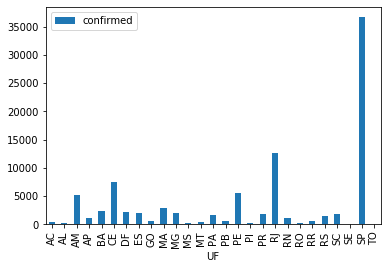

In [76]:
plt.figure(figsize=(14,8))
hip3limpo_df[["UF", "confirmed"]].groupby(["UF"]).sum().plot.bar()


**Dataframe de comparação do Início de Testagem.**

In [77]:
hip3t_df = completo_df[['UF','Início de testagem']]

In [78]:
hip3t_df

,UF,Início de testagem
0,AC,NaN
1,AC,NaN
2,AC,NaN
3,AC,NaN
4,AC,NaN
...,...,...
1036,ES,NaN
1037,ES,NaN
1038,ES,5/11/2020
1039,ES,6/24/2020


**Limpeza de todos os dados faltantes do Dataframe.**

In [79]:
hip3tlimpo_df = hip3t_df.dropna()

In [80]:
hip3tlimpo_df

,UF,Início de testagem
162,GO,5/9/2020
195,MG,5/19/2020
201,MG,6/11/2020
210,MG,4/16/2020
228,MG,4/15/2020
243,MG,4/27/2020
246,MG,5/9/2020
411,PE,05/26/2020
480,RJ,5/19/2020
549,RO,6/3/2020


**Tentei fazer uma ordenação das datas para efeito de análise.**

In [85]:
hip3tlimpo_df = hip3tlimpo_df.sort_values('Início de testagem', ascending = True)
print (hip3tlimpo_df)

      UF Início de testagem
833   SP         05/01/2020
411   PE         05/26/2020
900   SP         18/05/2020
588   RS         29/04/2020
228   MG          4/15/2020
210   MG          4/16/2020
243   MG          4/27/2020
1032  ES          5/11/2020
1023  ES          5/11/2020
1038  ES          5/11/2020
879   SP          5/13/2020
195   MG          5/19/2020
480   RJ          5/19/2020
162   GO           5/9/2020
246   MG           5/9/2020
201   MG          6/11/2020
1024  ES          6/24/2020
1033  ES          6/24/2020
1039  ES          6/24/2020
549   RO           6/3/2020
880   SP           6/3/2020


**CONCLUSÃO: Um grande problema que enfrentei neste dataframe, é que tem datas que estão no formato americano e outras não. Para tratar este fato, prefiro fazer antes da importação (por exemplo, no excel). Mas, para efeito de análise, podemos perceber que São Paulo iniciou em Março sua testagem, portanto é o que terá mais casos confirmados. Isto é o que está aconcetecendo nos Estados Unidos por exemplo, onde o presidente TRUMP solicitou a interrupção de testagem para não agravar mais ainda os dados de confirmação da doença.**